<a href="https://colab.research.google.com/github/YousefIbrahem/yousef_ibrahem/blob/master/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import librares

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error


read data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

EDA

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


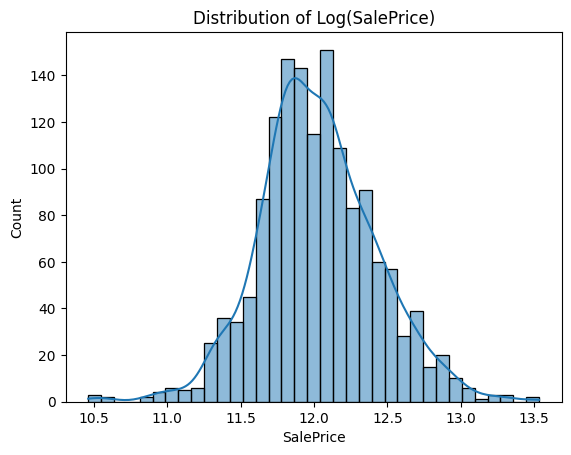

In [3]:
print(train['SalePrice'].describe())
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.title("Distribution of Log(SalePrice)")
plt.show()


the relation between features and price

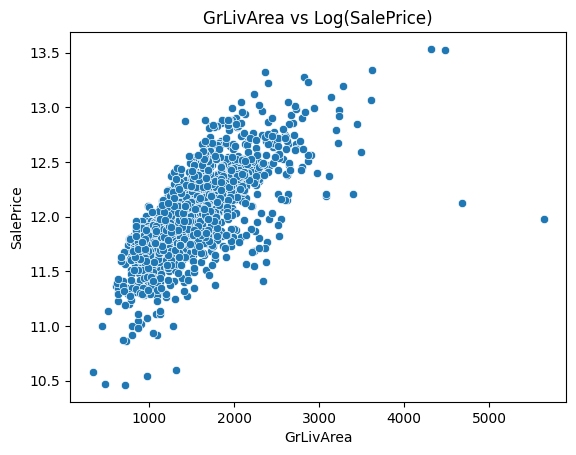

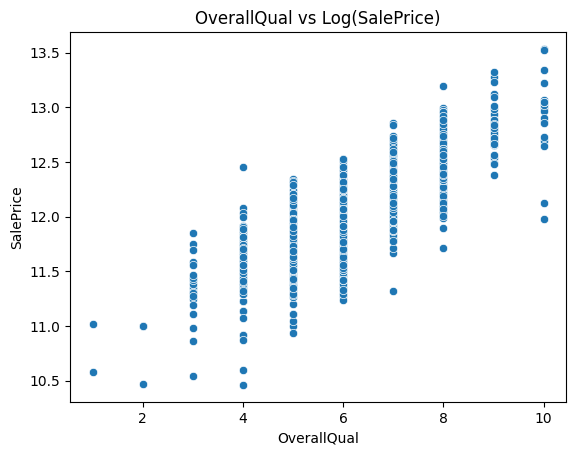

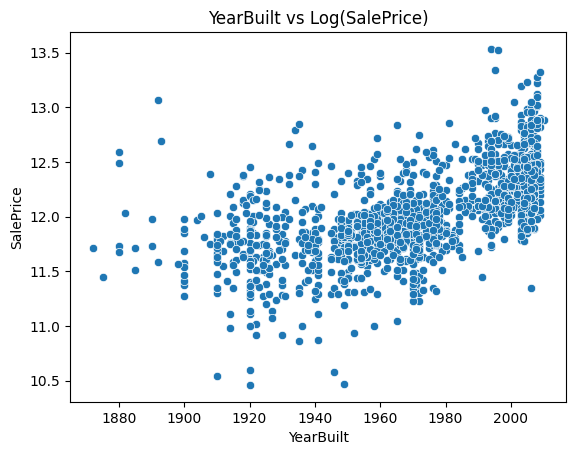

In [4]:
for col in ['GrLivArea','OverallQual','YearBuilt']:
    sns.scatterplot(x=train[col], y=np.log1p(train['SalePrice']))
    plt.title(f"{col} vs Log(SalePrice)")
    plt.show()


Data Manipulation

In [5]:
all_data = pd.concat([train.drop('SalePrice',axis=1), test], ignore_index=True)

Fill empty values of numeric features with column average

In [7]:
for col in all_data.select_dtypes(include=[np.number]).columns:
    all_data[col].fillna(all_data[col].mean(), inplace=True)


/tmp/ipython-input-3382328605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(all_data[col].mean(), inplace=True)


Fill none

In [8]:
all_data = pd.get_dummies(all_data, dummy_na=True)

# Re-separate data after processing

In [9]:
n_train = train.shape[0]
X = all_data[:n_train]
X_test = all_data[n_train:]
y = np.log1p(train['SalePrice'])


# Data segmentation for local evaluation

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Training and evaluating a Random Forest model

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [12]:
y_pred = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_pred), np.expm1(y_val)))
print(f"RMSLE على مجموعة التقييم: {rmsle:.4f}")


RMSLE على مجموعة التقييم: 0.1470


#Improved performance and K-Fold experience

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_log_error', cv=kf)
print("RMSLE متوسط عبر K-Fold:", np.sqrt(-scores).mean().round(4))


RMSLE متوسط عبر K-Fold: 0.0113
